## This is a data set I found on kaggle and I wanted to use my MBA back ground to see what I could forecast for the walmart store sales.

Data set @ Kaggle: [Link](https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail)

Dataset Description :

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Analysis Tasks

Basic Statistics tasks

1) Which store has maximum sales

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3) Which store/s has good quarterly growth rate in Q3’2012

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5) Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
import IPython

In [7]:
df = pd.read_csv('Walmart.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


From inspecting the data set above ive noticed there are some key economic column factors that are included for each row. 

They are: 

[Holiday_Flag]

[Fuel_Price]

[CPI](Consumer Price Index: measures the average change over time in the prices paid by urban consumers for a basket of consumer goods and services. It's a widely used indicator for measuring inflation and economic performance)

[Unemployment](Rate of unemployment)

Understaning the importance of these indicators I will first aim to find any correlation between weekly sales and any indicator provided. 

## Data Mining

In [8]:
#df['Date'].dtype ## Date collumn is stored as string and will need to be converted to a datetime data type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Convert to datetime

#df['Store'].dtype ## Store collumn is stored as an integer and I will convert it to categorical 
df['Store'] = df['Store'].astype('category') # Convert to categorical



In [9]:
#Checking for missing values. I can actually do this by using DataWrangler in VSCODE. However, I still created a function to display it on my notebook.
def countna(df):
    return df.isna().sum()
mis_val_count = countna(df)
mis_val_count # no missing values 


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#Extracting additional date-related features: Using the .dt accessor to extract additional features such as day of the week, month, quarter, year, etc. Then adding them as new columns to the DataFrame.

In [10]:
# Extract additional date-related features
df['Month'] = df['Date'].dt.month            # Month (1-12)
df['Quarter'] = df['Date'].dt.quarter        # Quarter (1-4)
df['Year'] = df['Date'].dt.year              # Year


#rearranging newly created collumns
new_column_order = ['Store', 'Date', 'Month', 'Quarter', 'Year', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df = df[new_column_order]

In [11]:
df

,Store,Date,Month,Quarter,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,2,1,2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,2,1,2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,2,1,2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,2,1,2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,3,1,2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,9,3,2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,10,4,2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,10,4,2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,10,4,2012,718125.53,0,56.47,3.969,192.330854,8.667


## Visulizations: EDA

In [12]:
#Syle:
sns.set_palette("Spectral")
sns.set_style("white")


### Using a new Library I came across on linked in and blog articles called sweetviz, Version: 2.3.1: https://pypi.org/project/sweetviz/

In [32]:
eda = sv.analyze([df,'Data'],target_feat= "Weekly_Sales")

                                             |          | [  0%]   00:00 -> (? left)


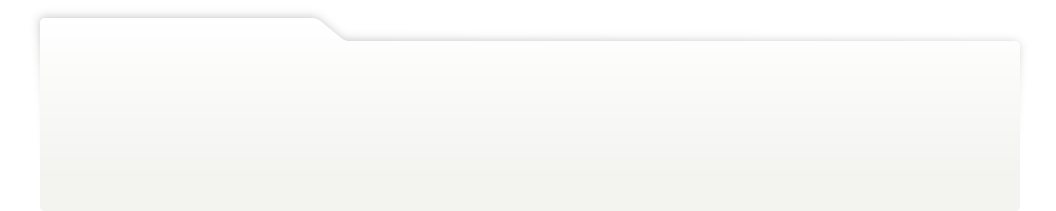
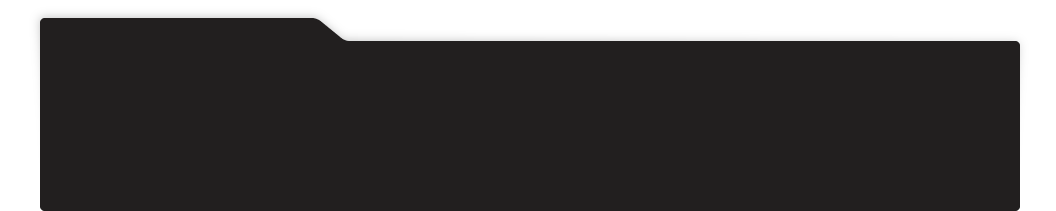
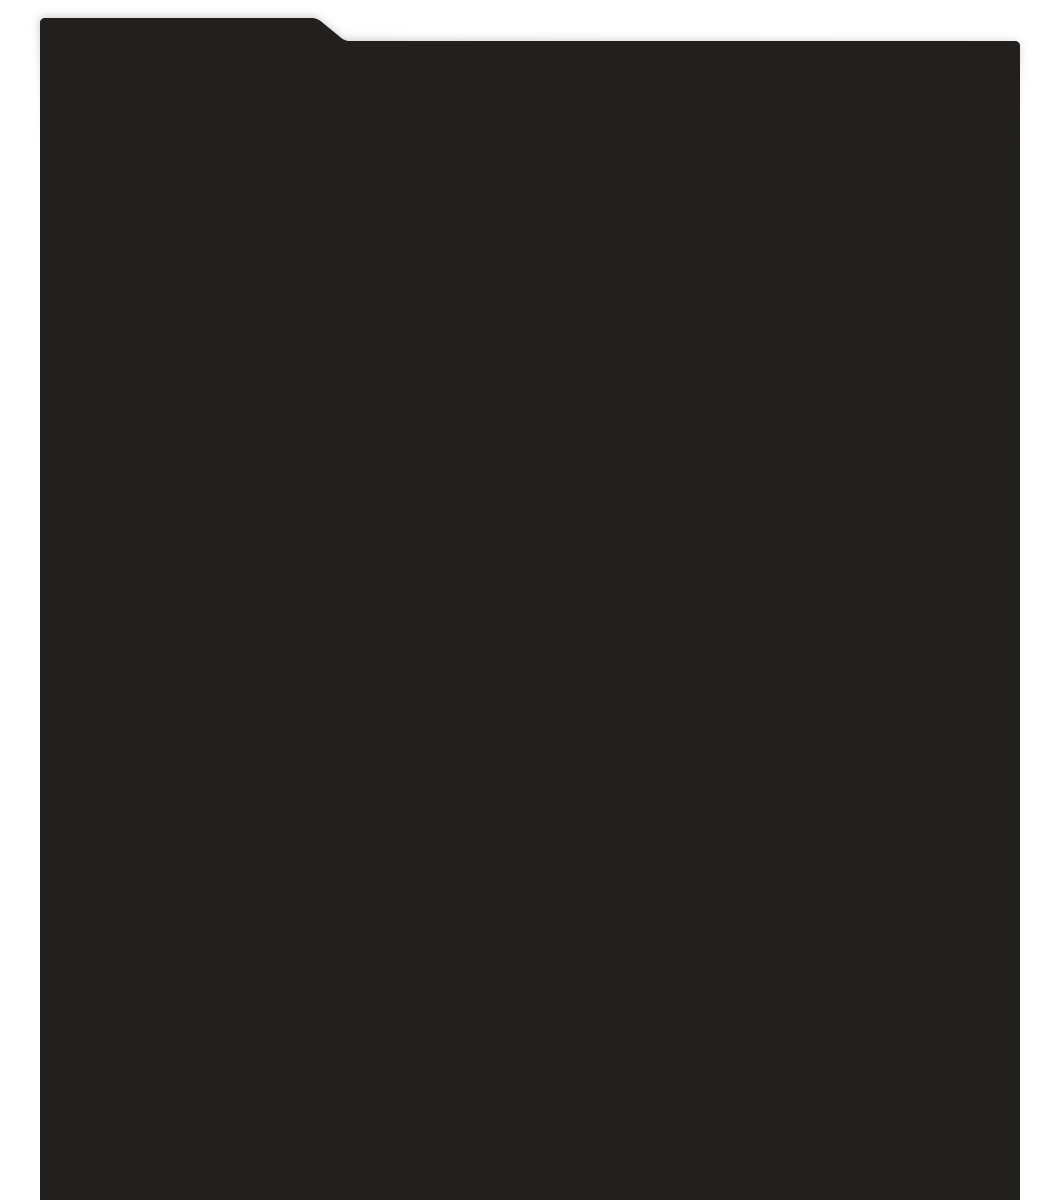
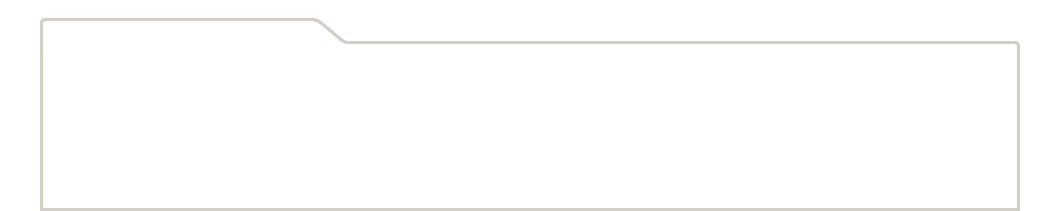
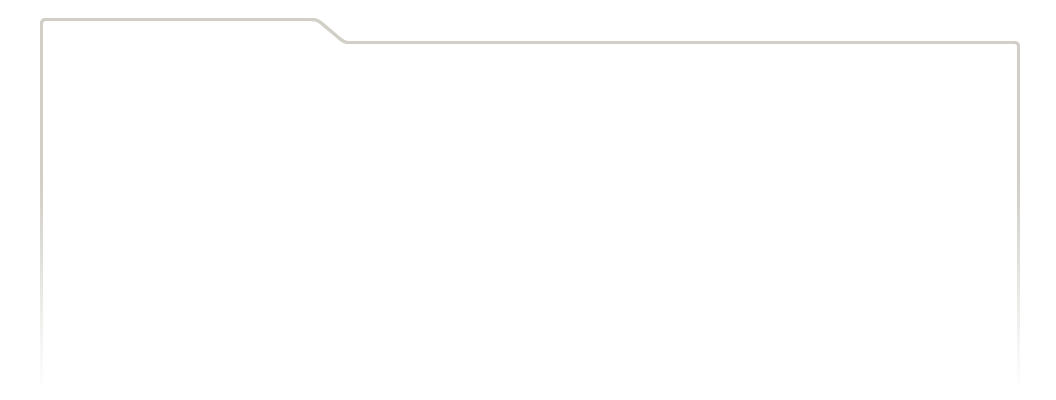
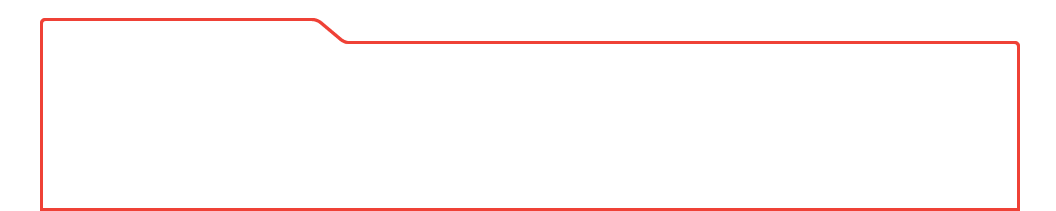
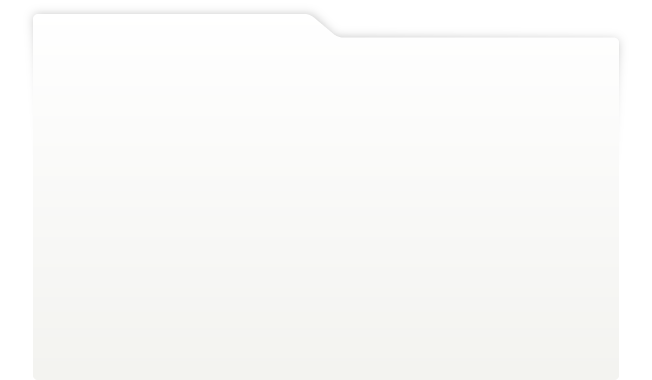
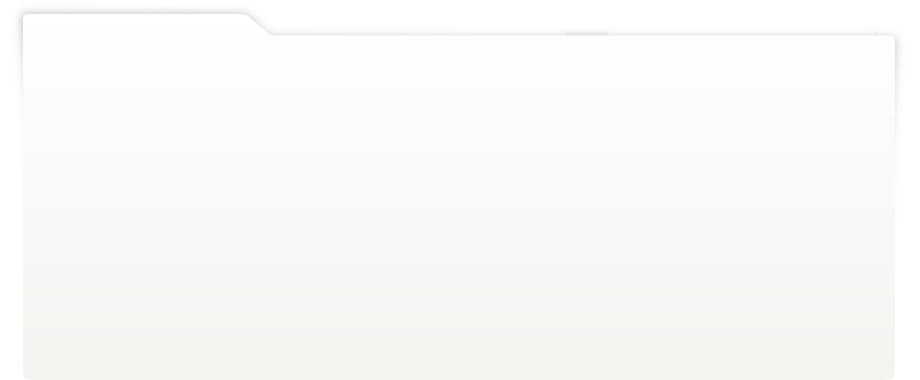
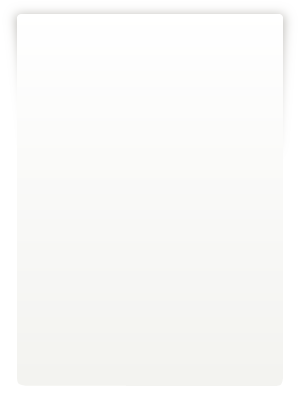
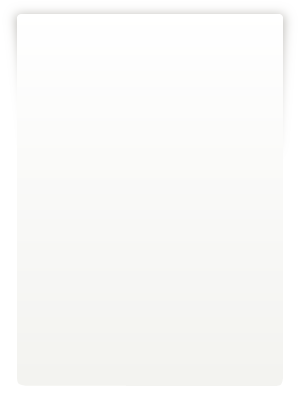
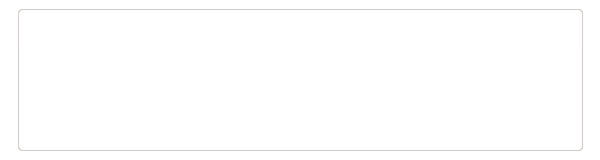
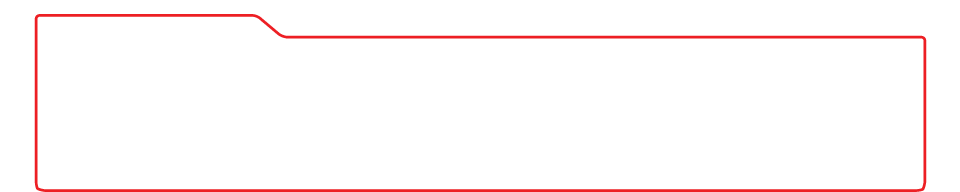
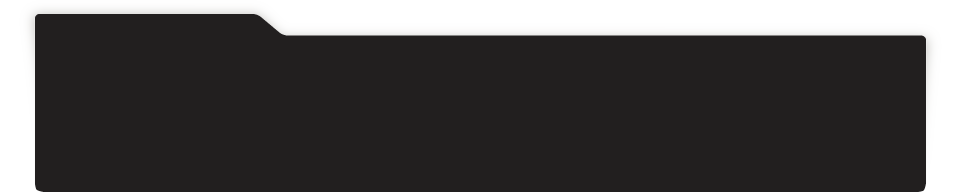
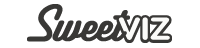
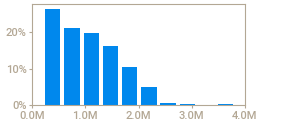
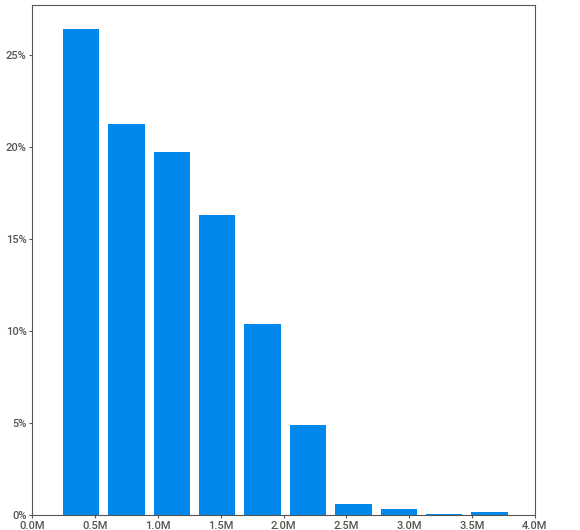
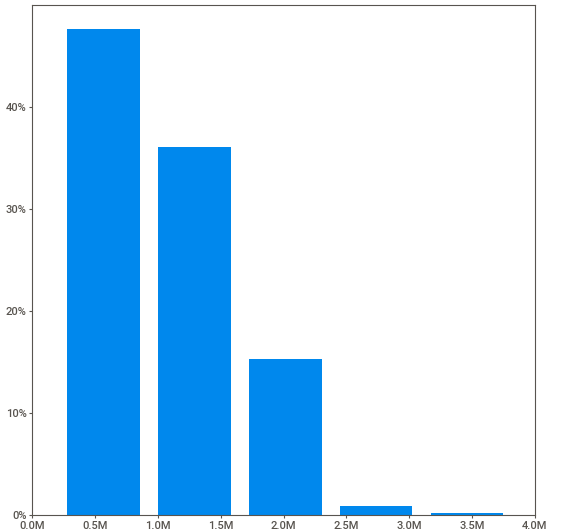
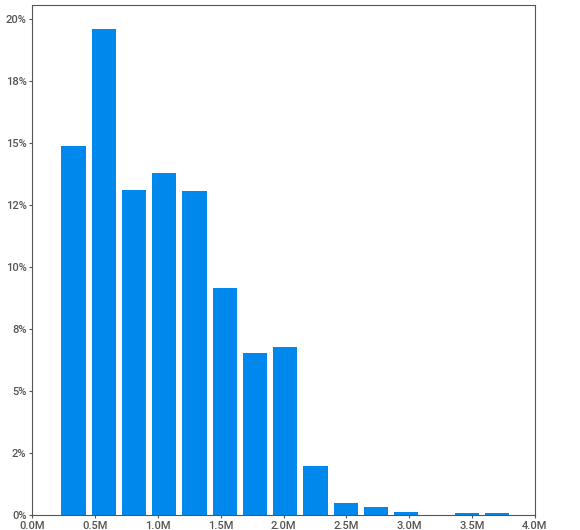
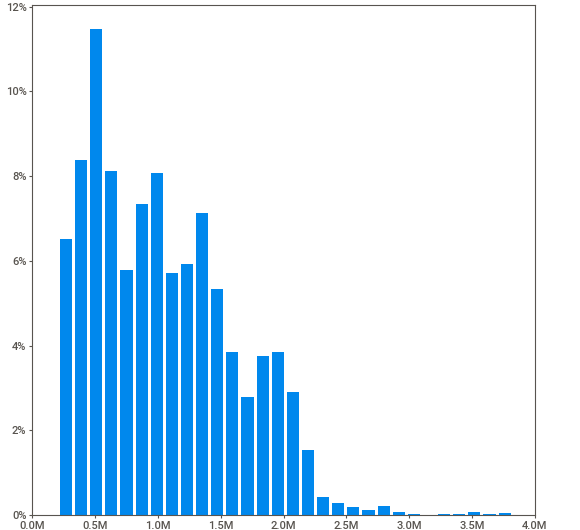
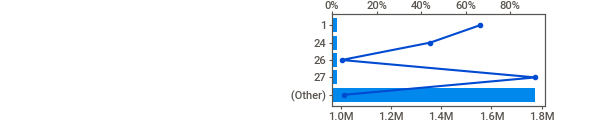
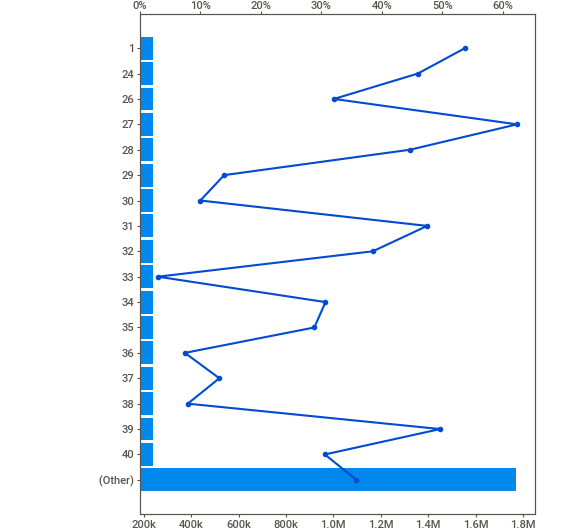
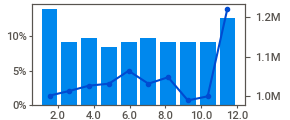
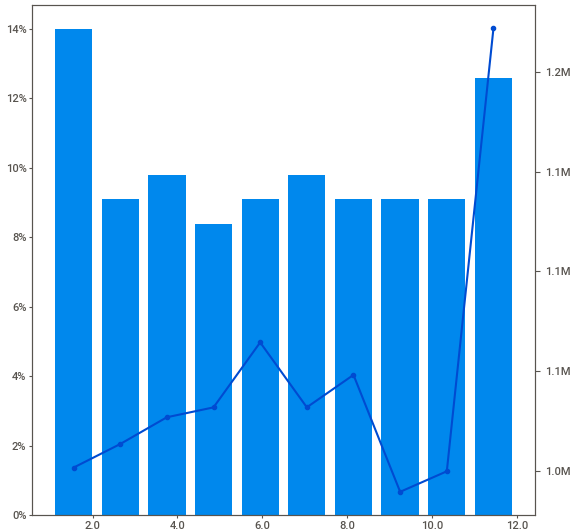
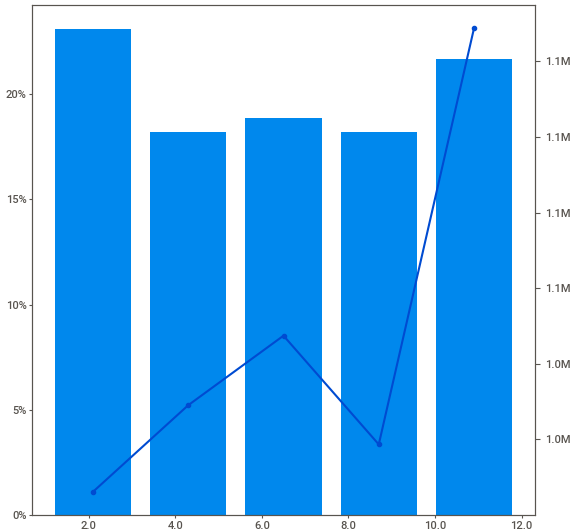
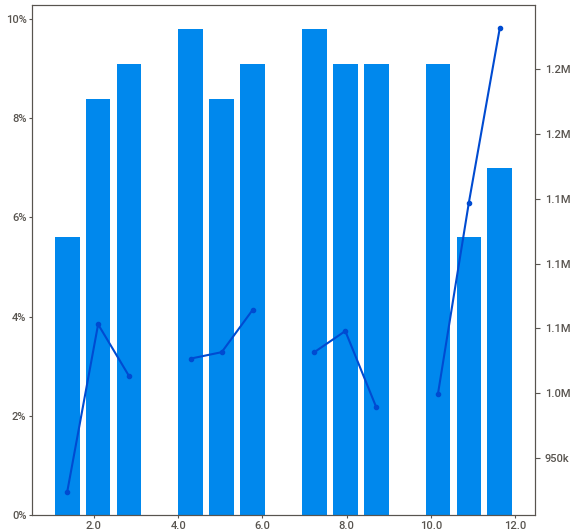
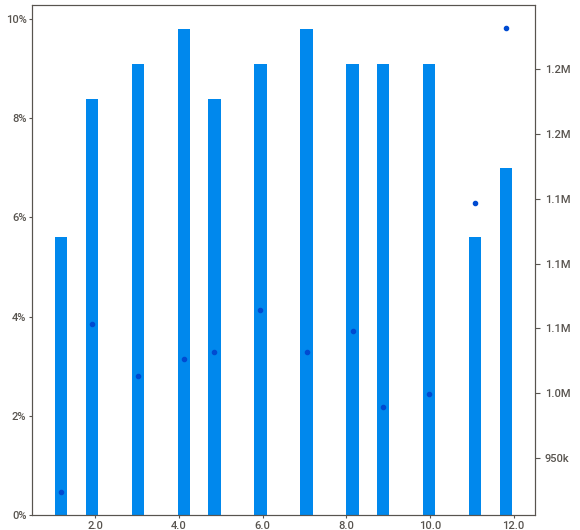
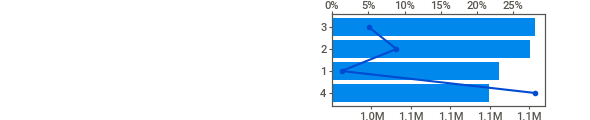
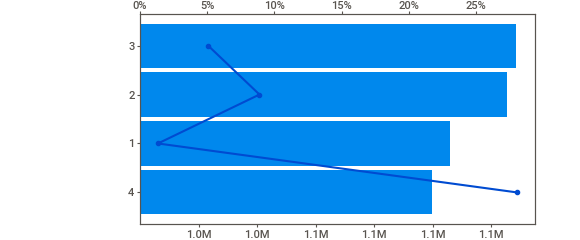
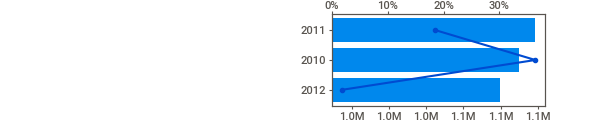
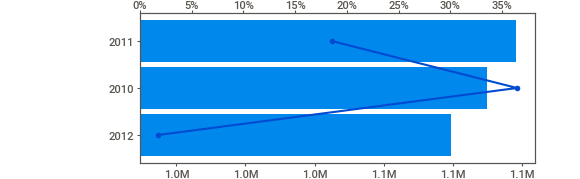
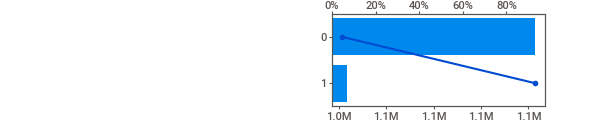
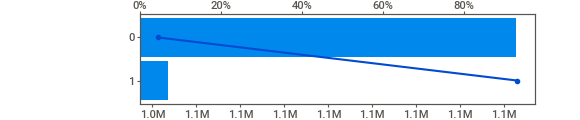
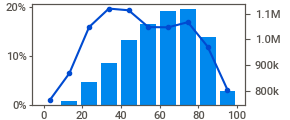
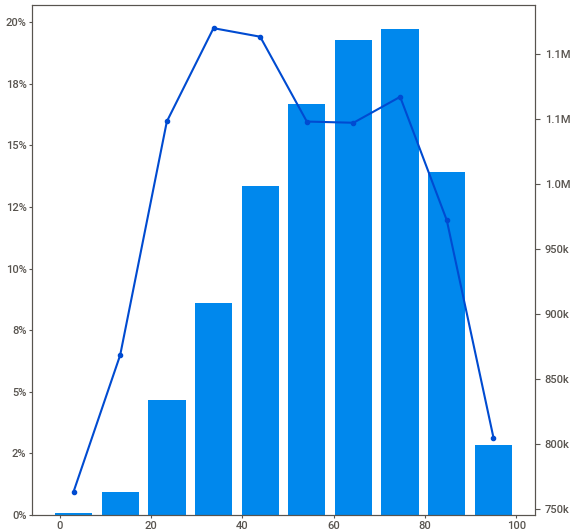
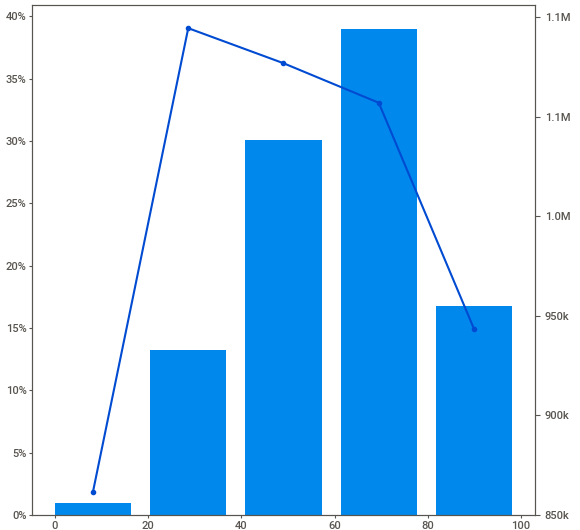
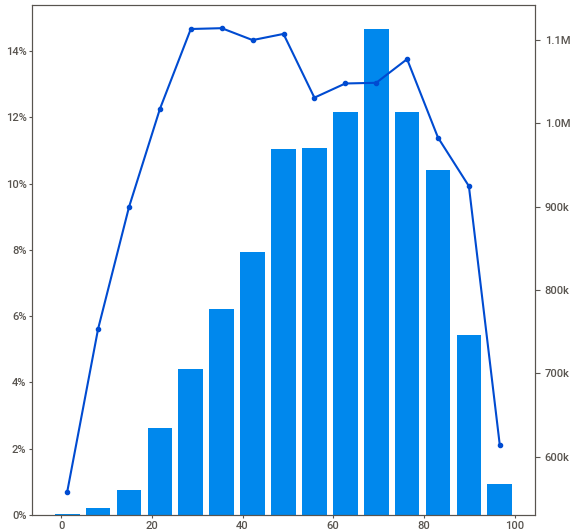
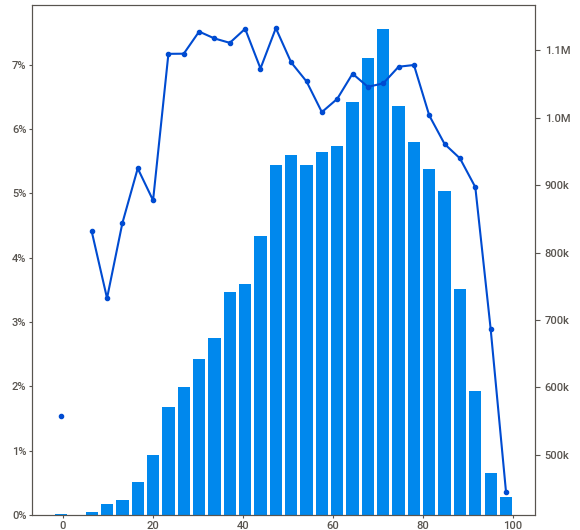
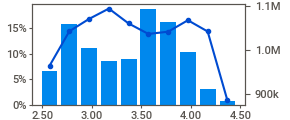
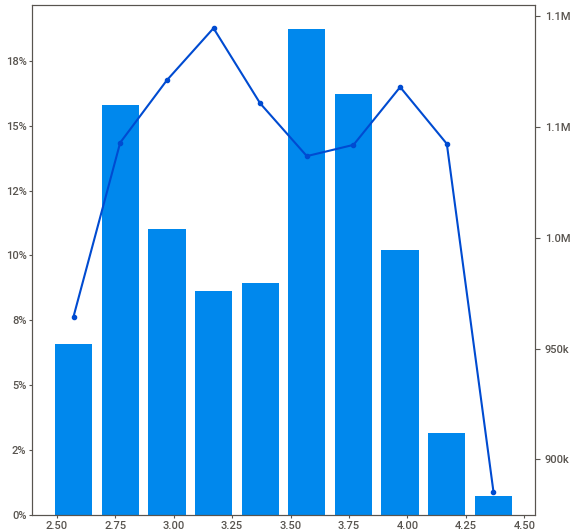
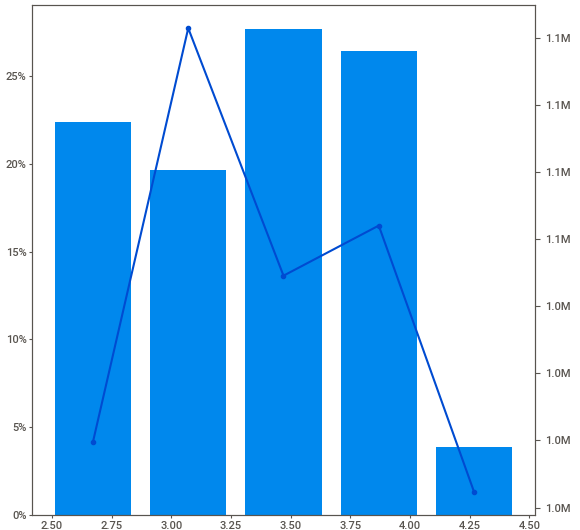
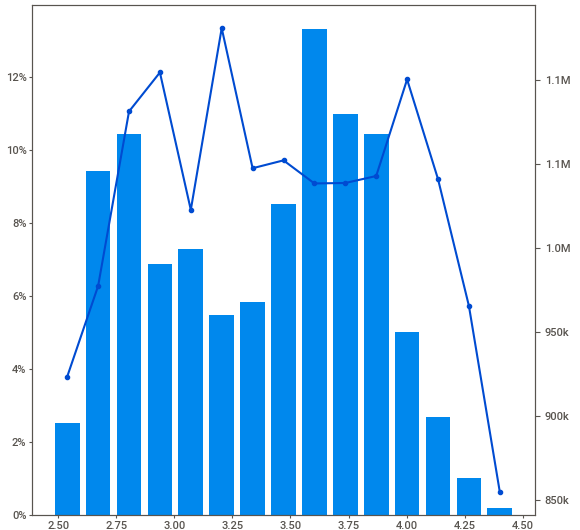
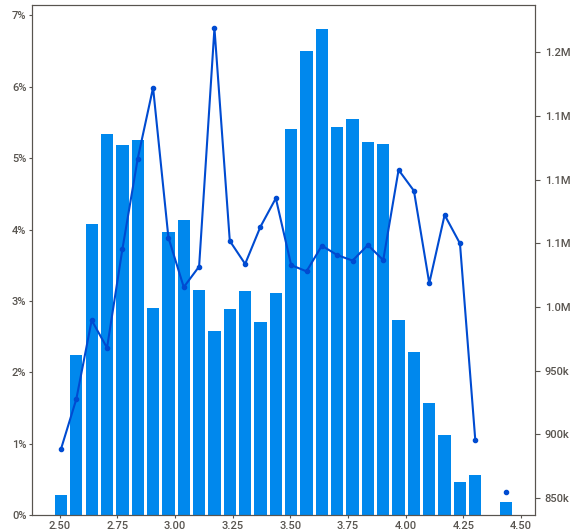
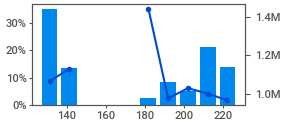
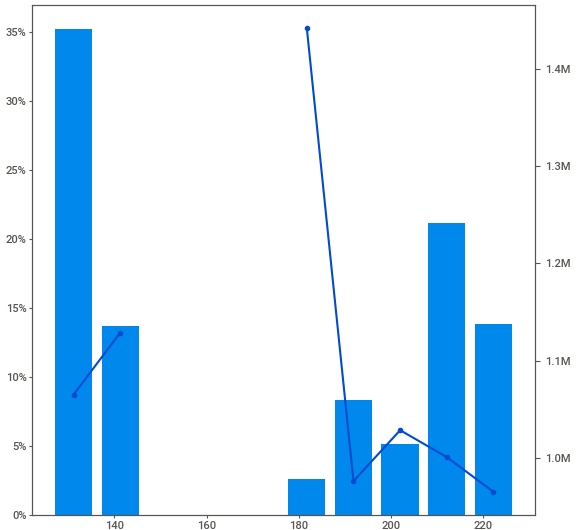
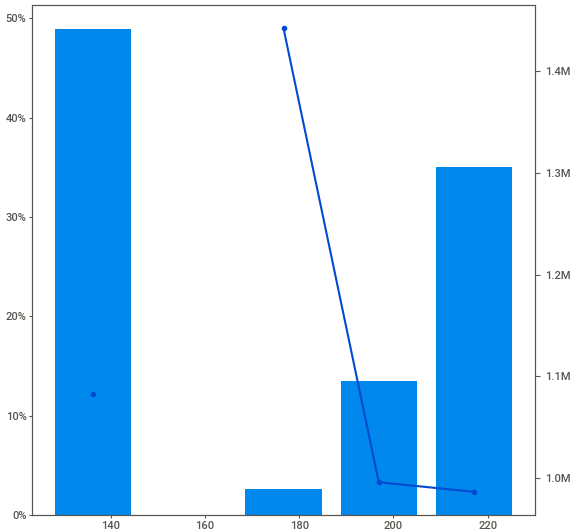
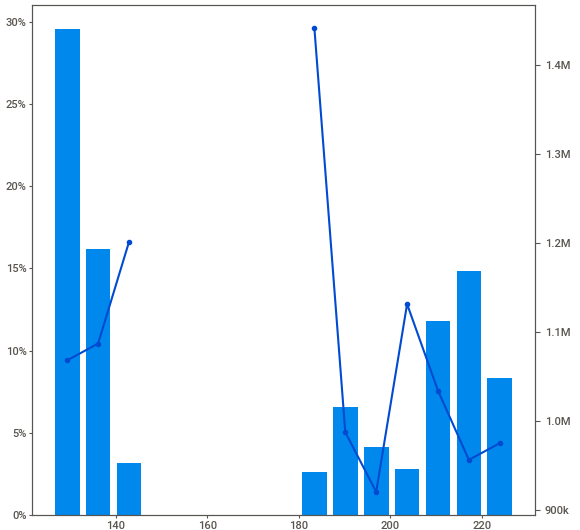
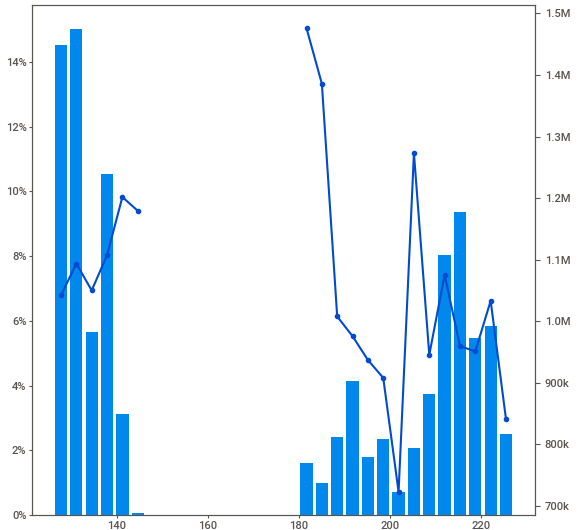
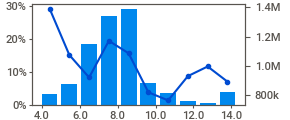
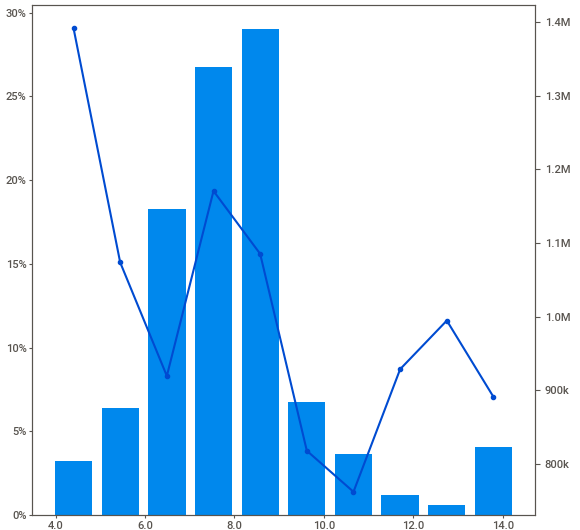
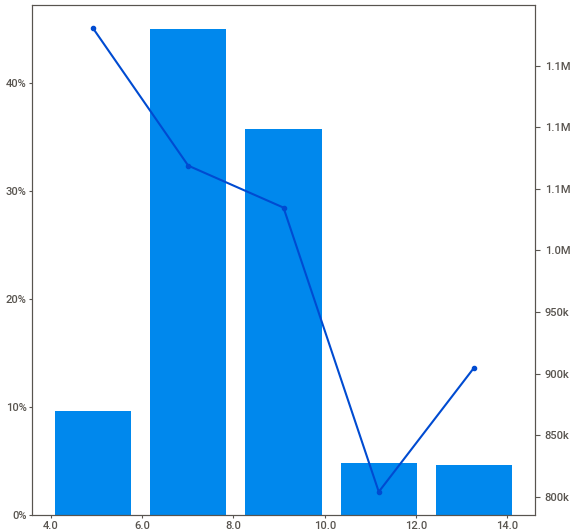
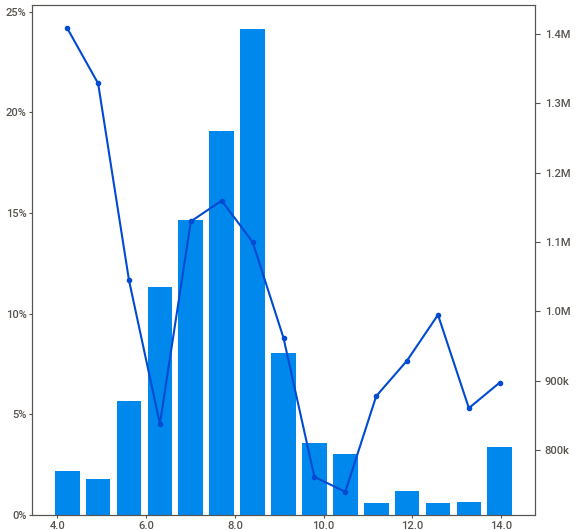
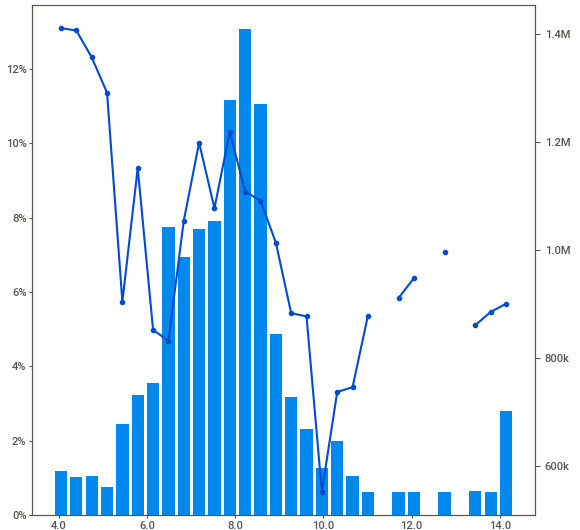
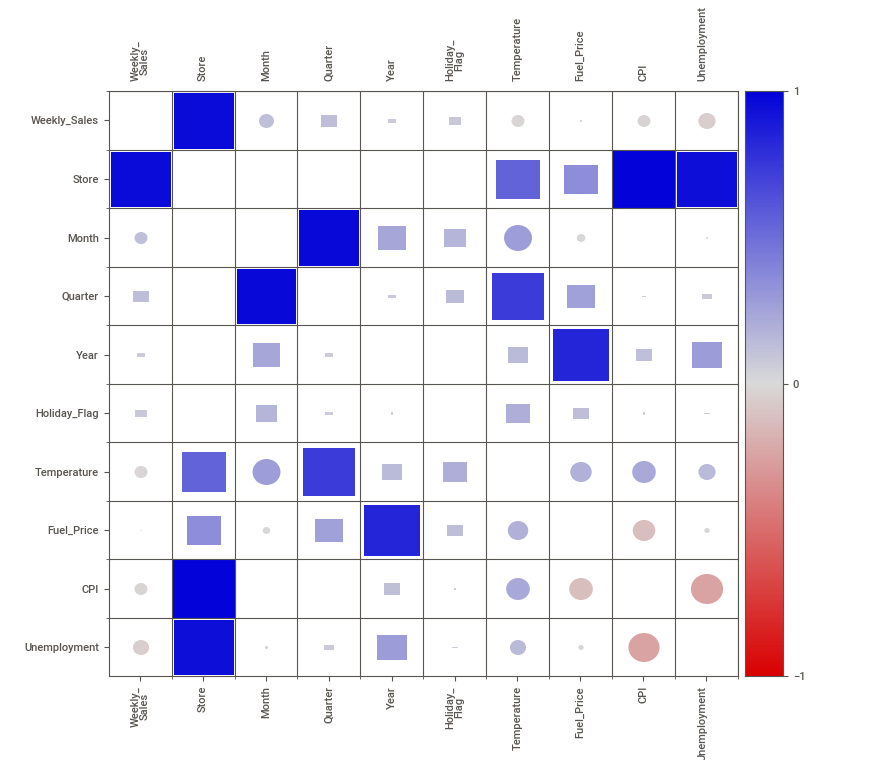
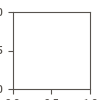

In [35]:
eda.show_notebook(layout='widescreen')



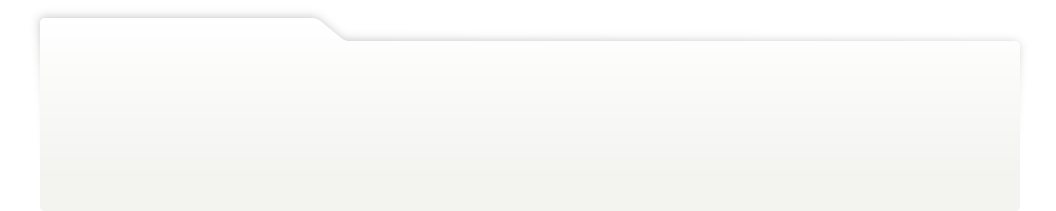
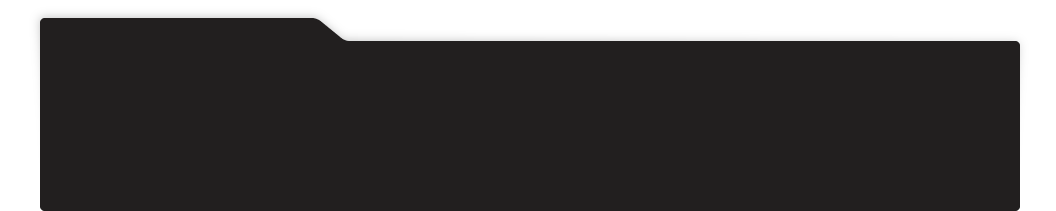
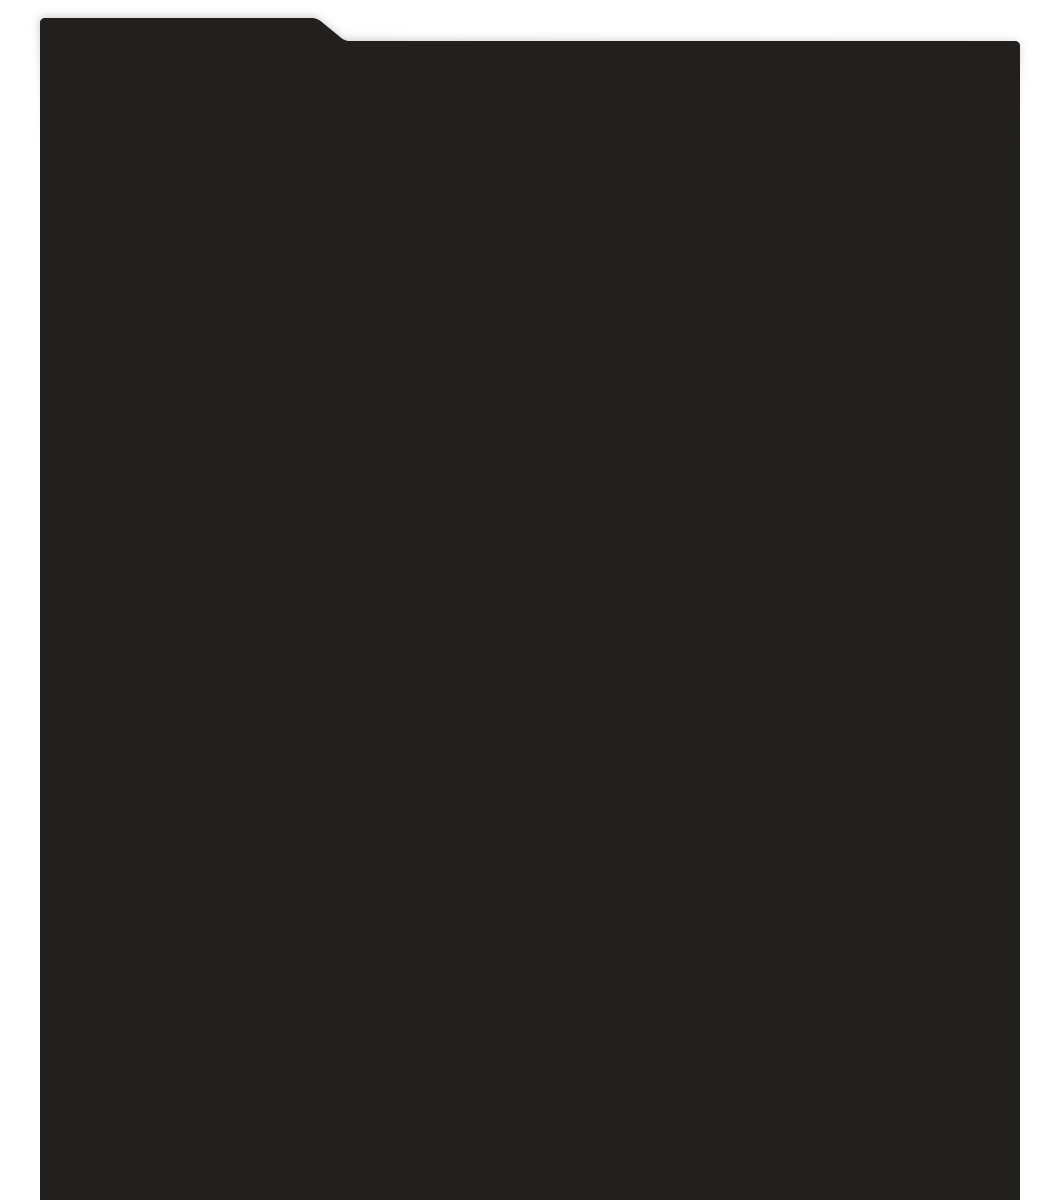
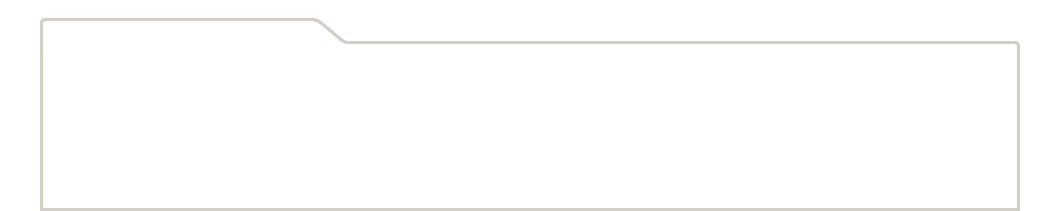
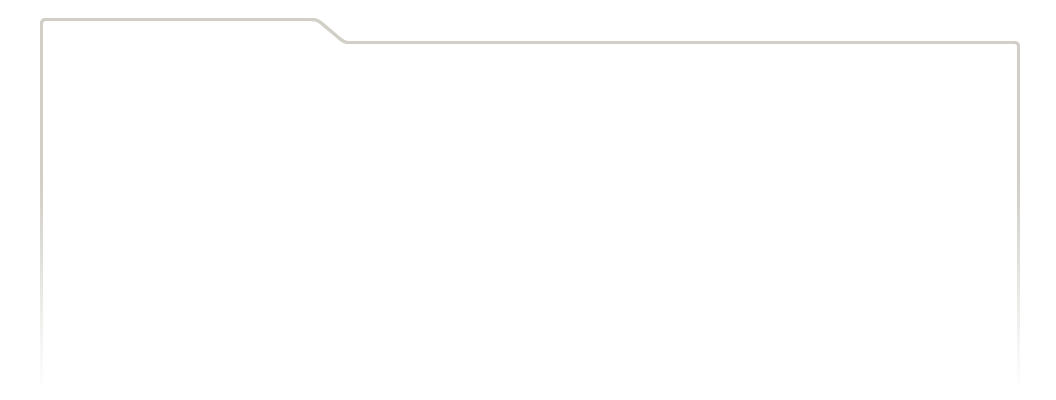
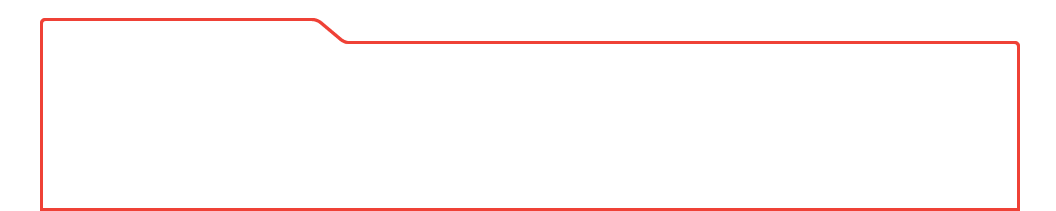
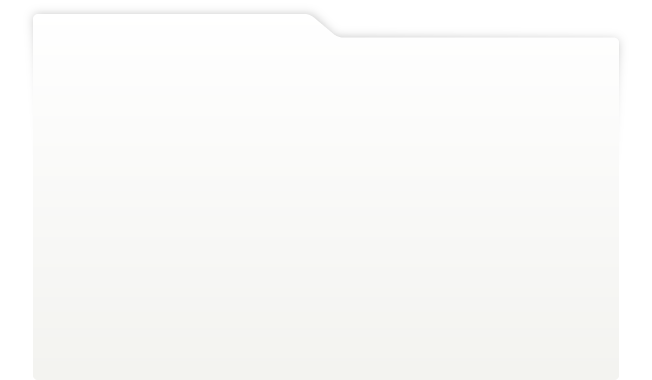
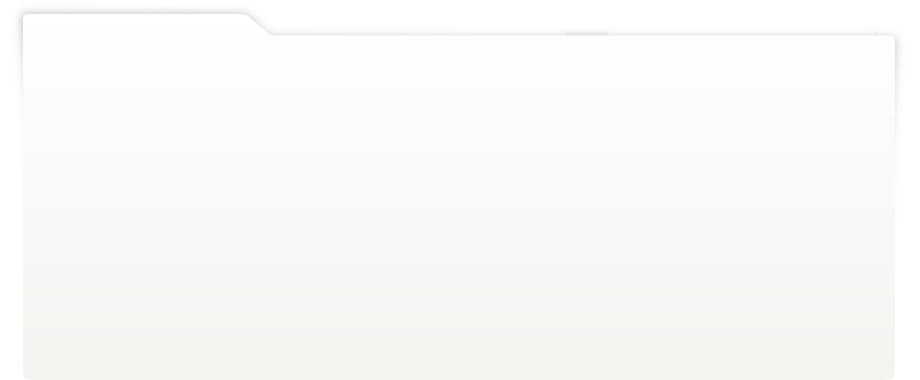
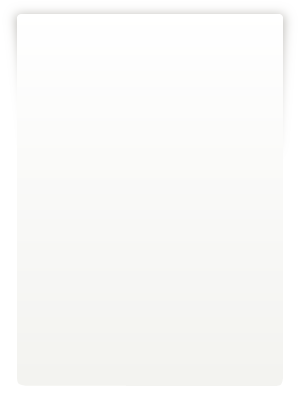
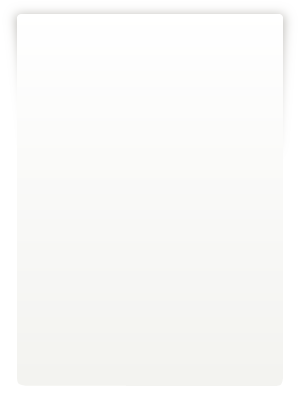
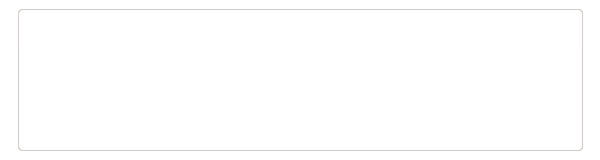
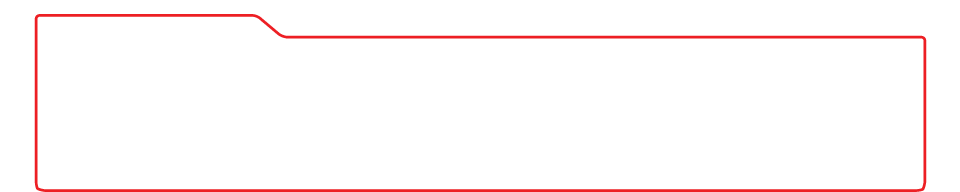
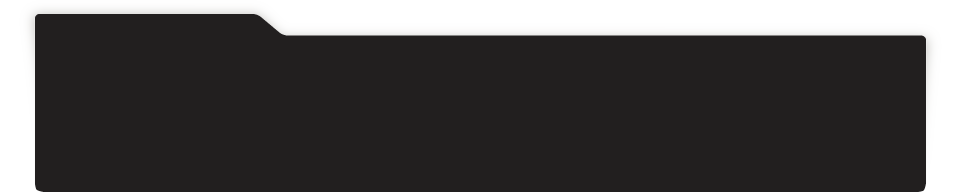
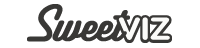
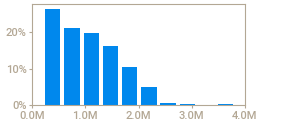
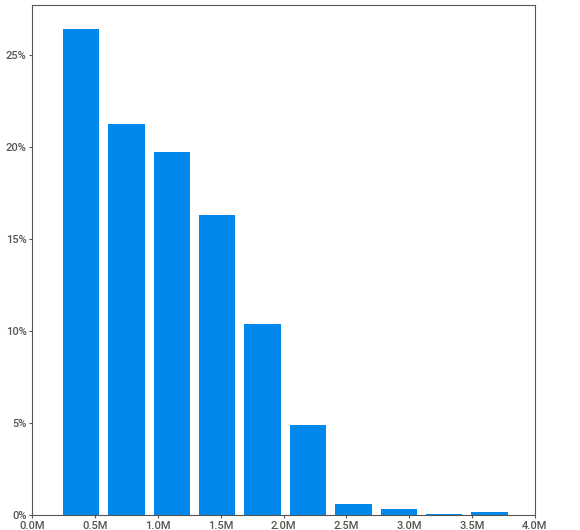
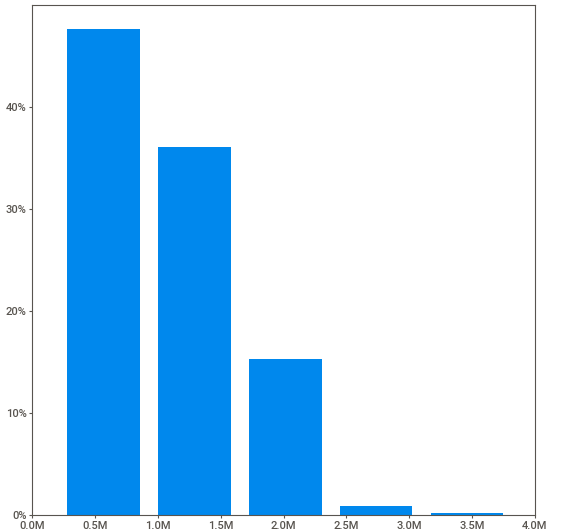
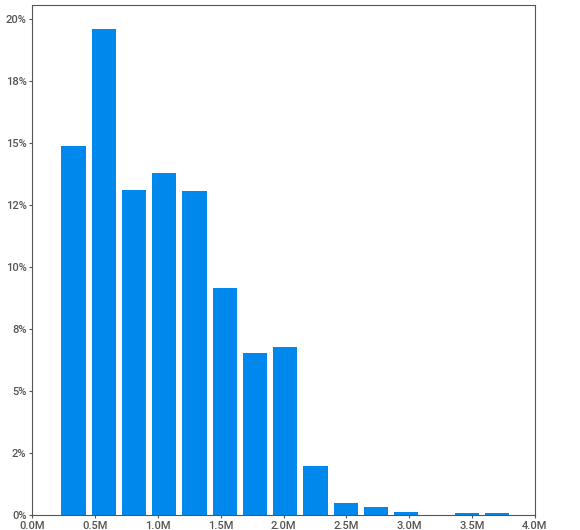
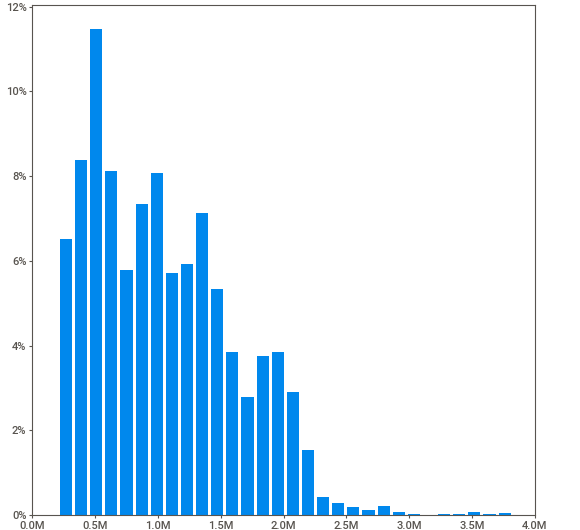
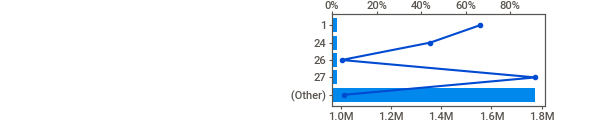
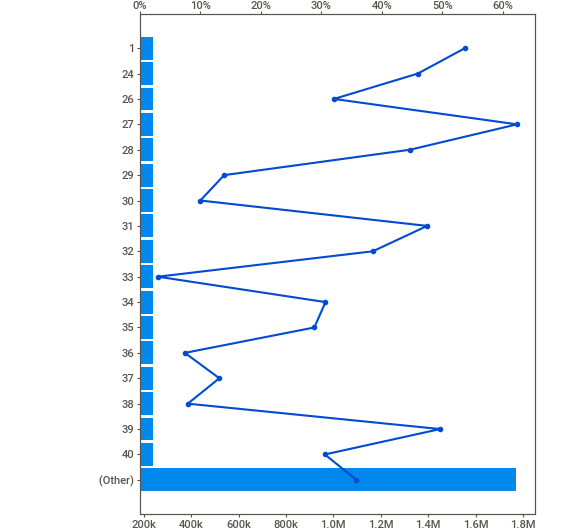
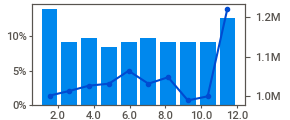
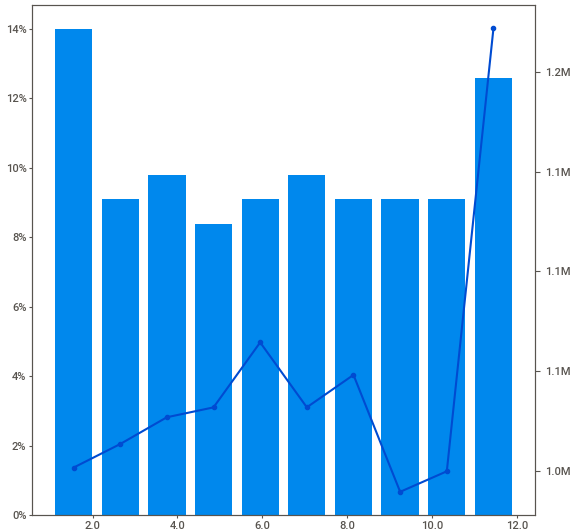
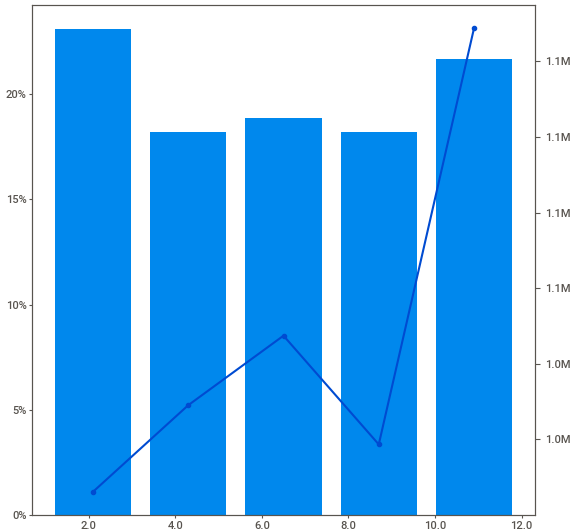
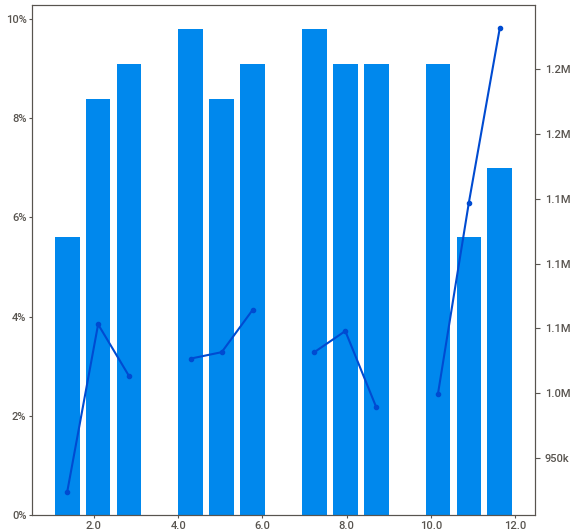
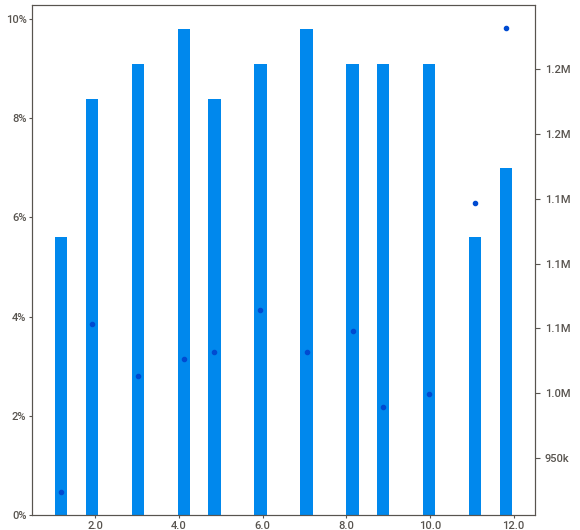
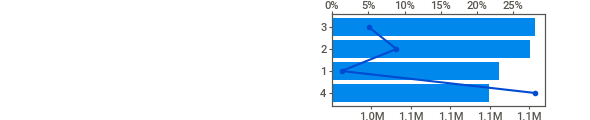
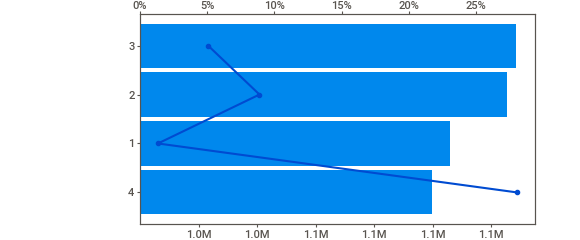
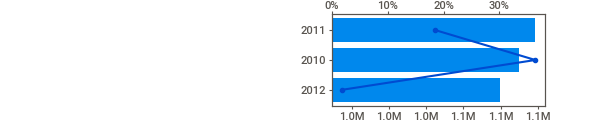
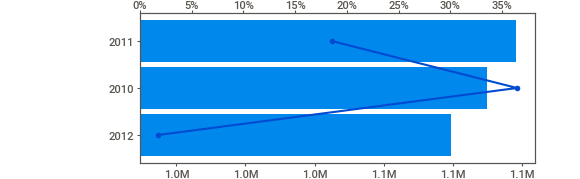
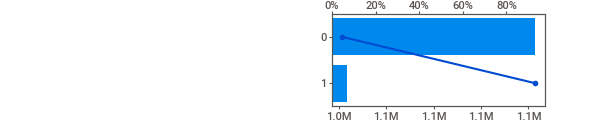
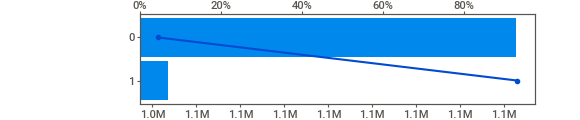
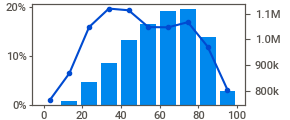
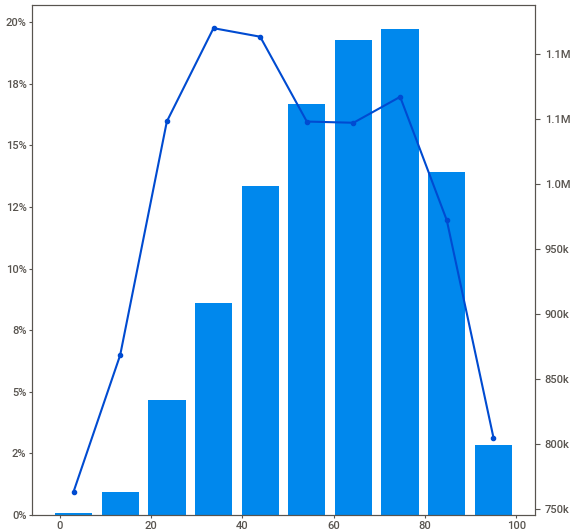
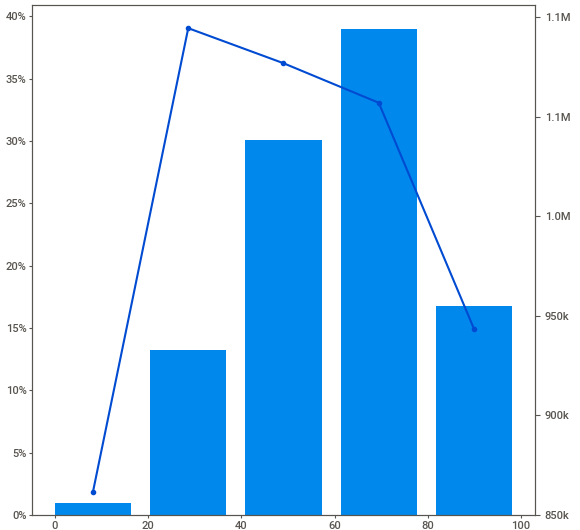
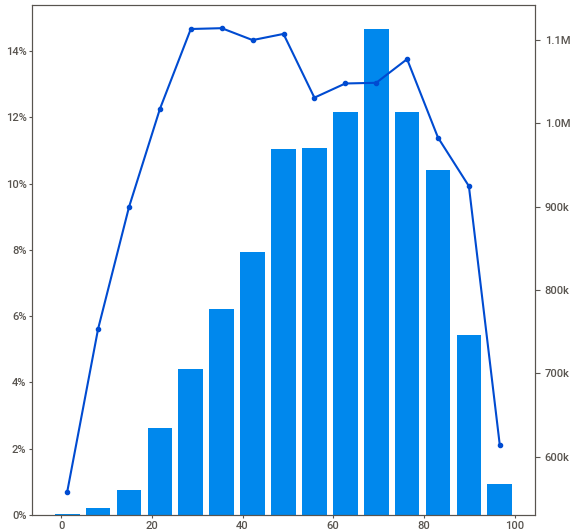
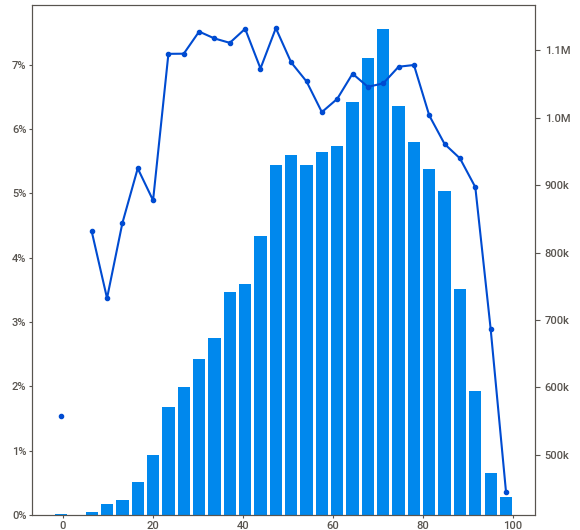
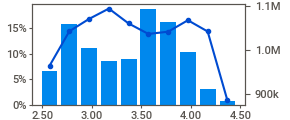
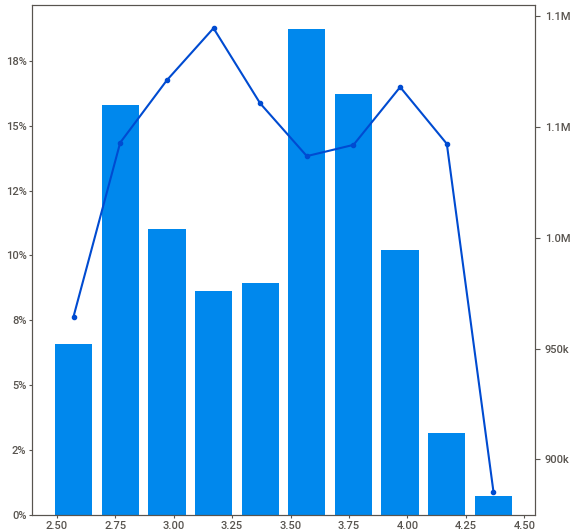
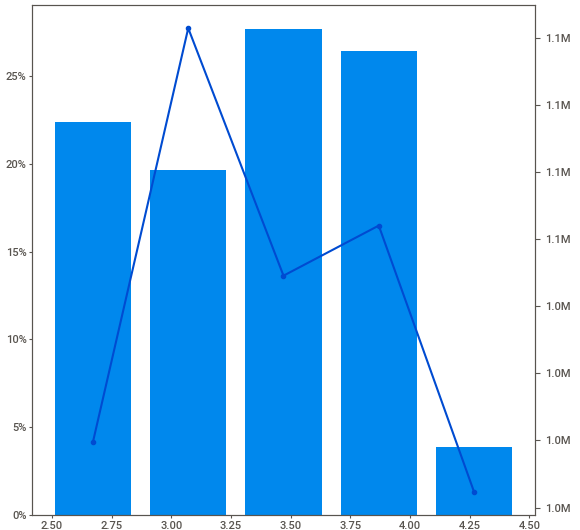
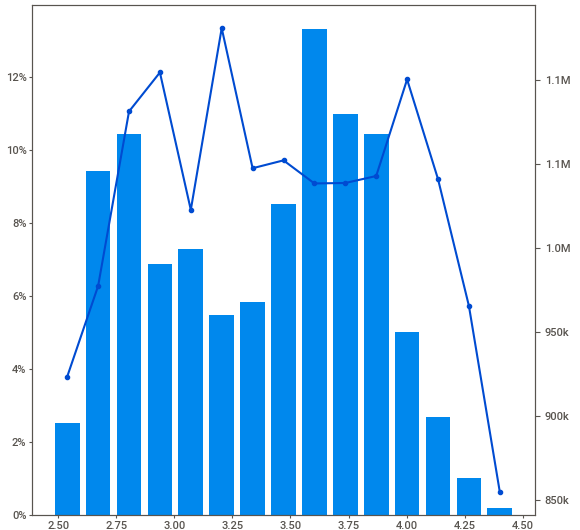
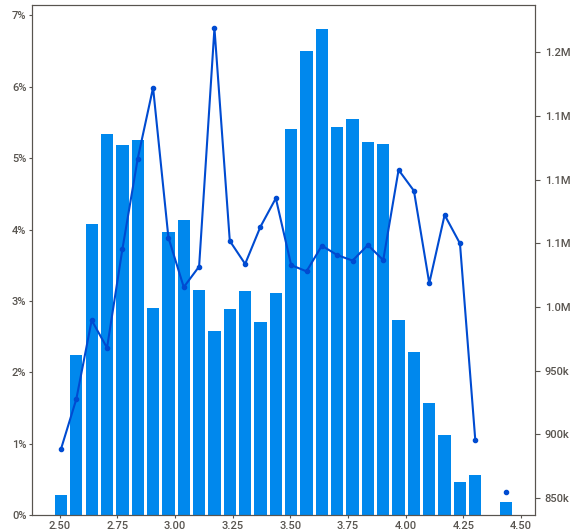
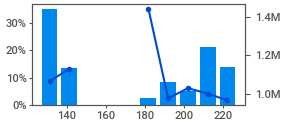
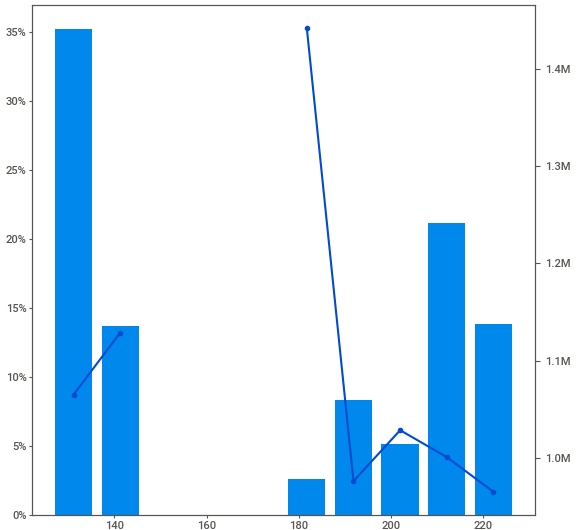
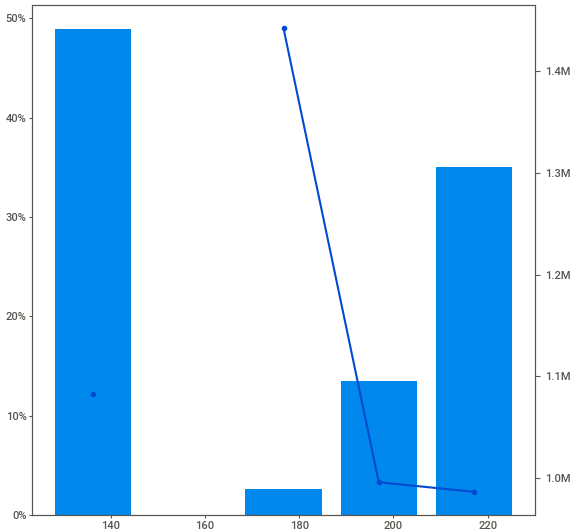
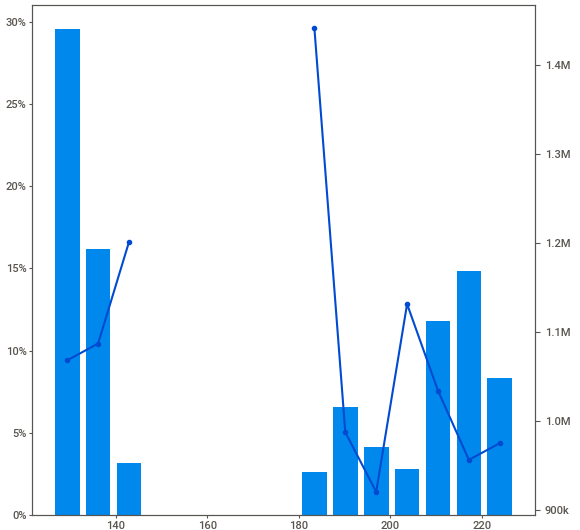
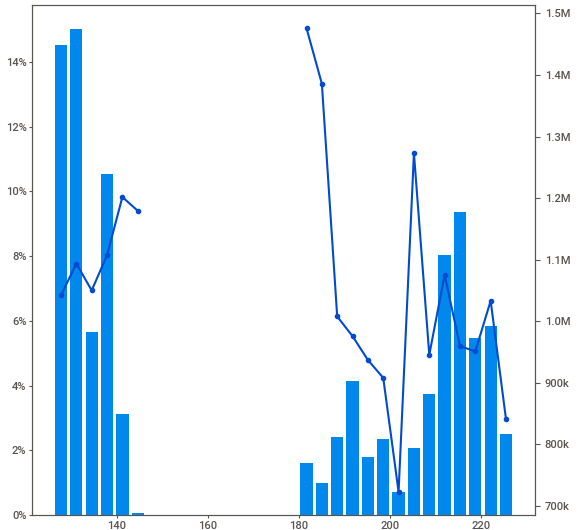
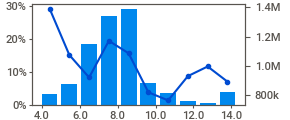
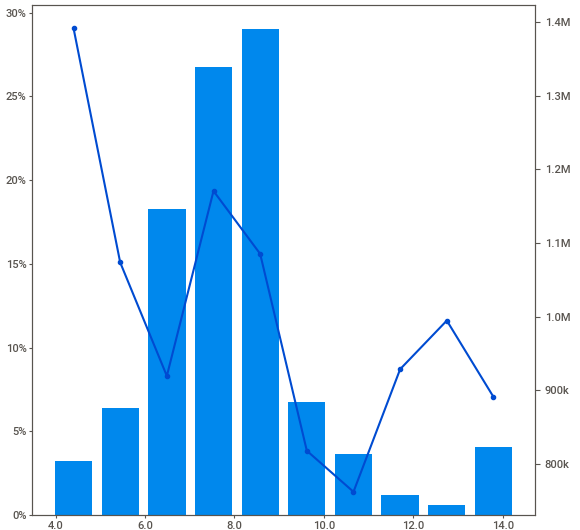
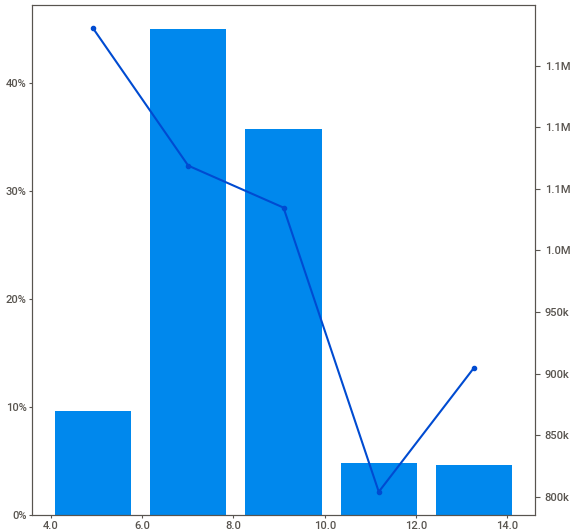
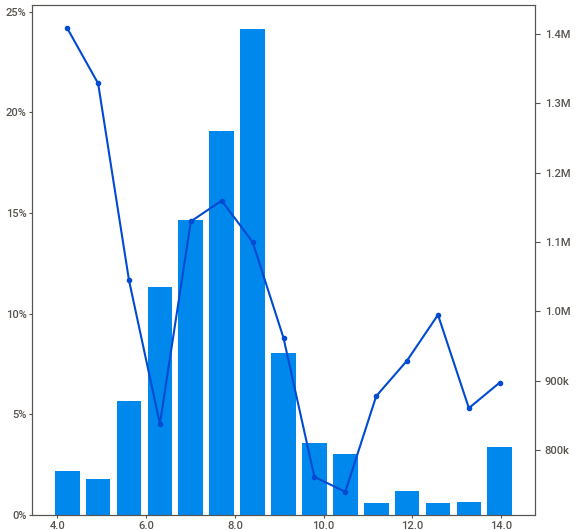
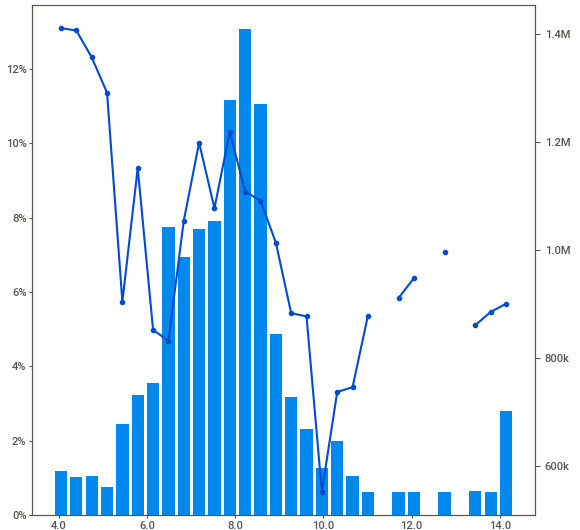
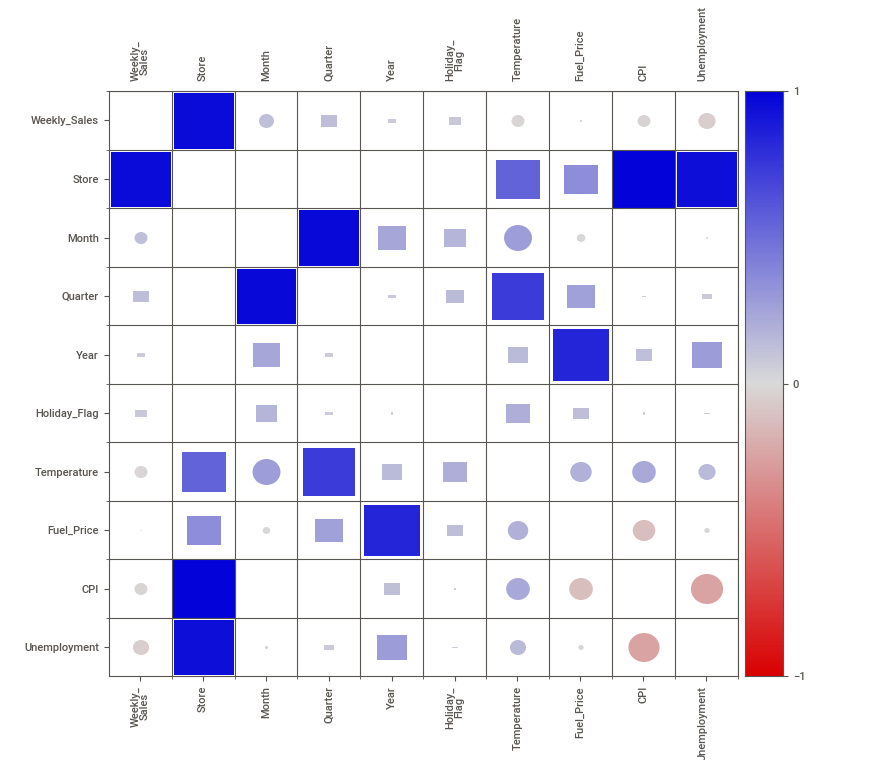
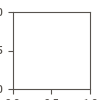

In [33]:
eda.show_notebook()

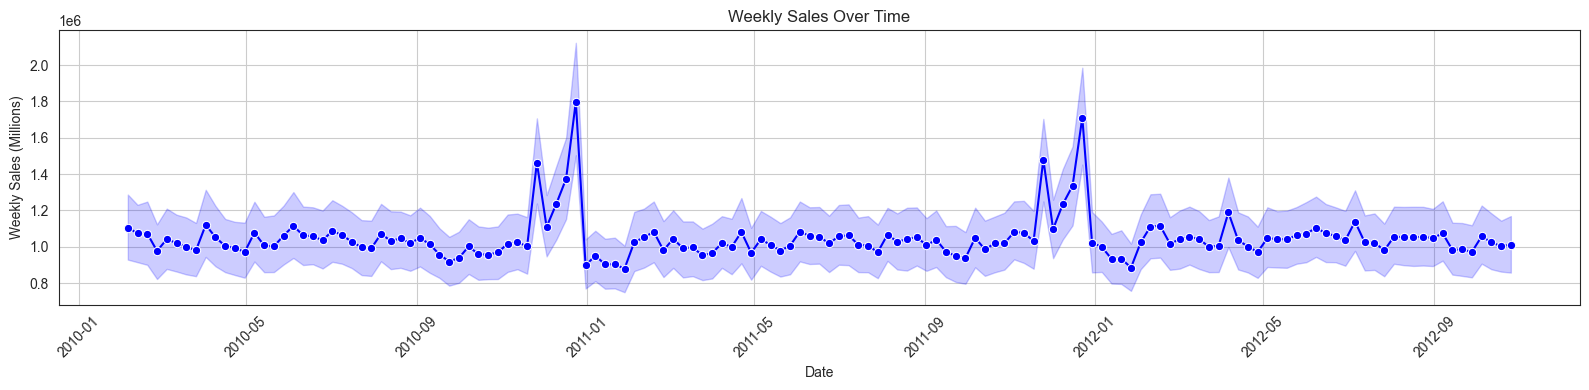

In [13]:
#Time Series Plot of Weekly Sales: Plot the weekly sales over time to visualize the overall trend and seasonal patterns. This can help identify trends, seasonality, and any anomalies in the sales data.


# Plot weekly sales over time using seaborn
plt.figure(figsize=(16, 4))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', marker='o', color='b')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (Millions)')
plt.grid(True) 
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

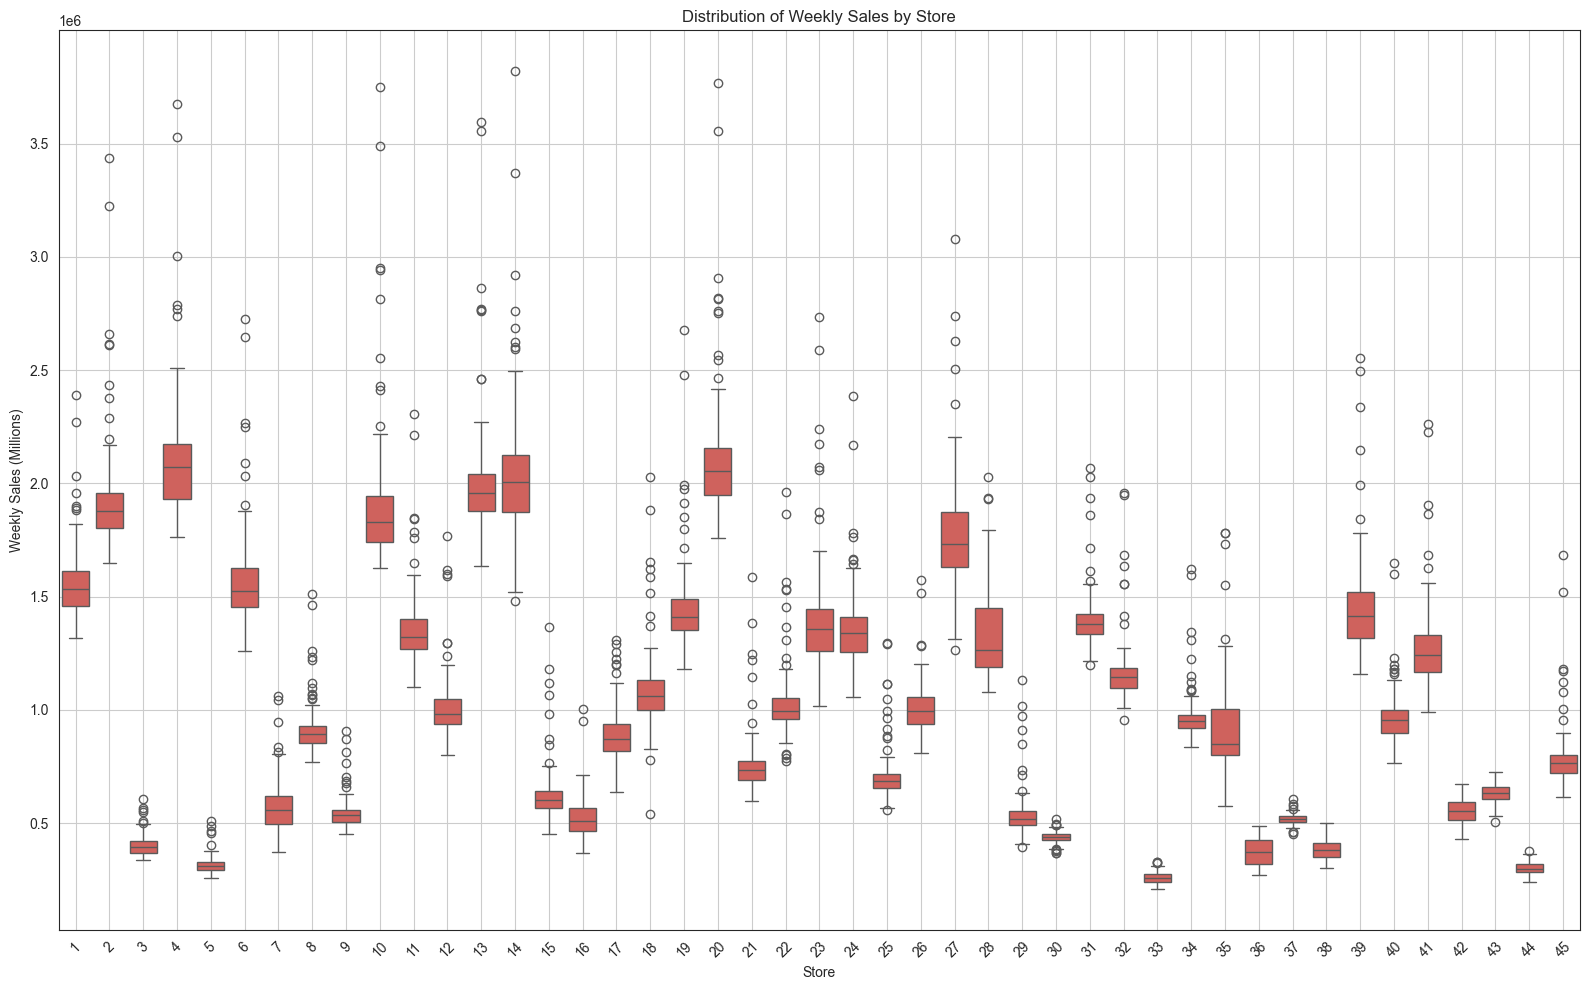

In [14]:
#Box Plot of Weekly Sales by Store: Create a box plot to visualize the distribution of weekly sales across different stores. 
#This can help identify variations in sales performance between stores and potential outliers.


# Create a box plot of weekly sales by store
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title('Distribution of Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales (Millions)')
plt.xticks(rotation=45)
plt.grid(True) 
plt.tight_layout()  
plt.show()

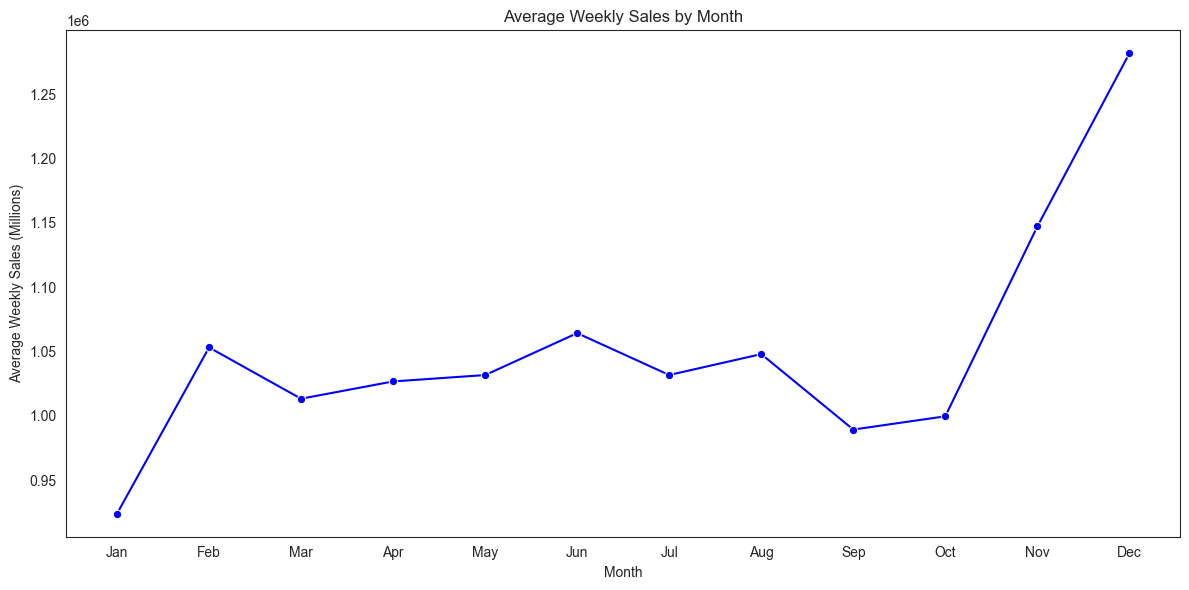

In [15]:
#Line Plot of Weekly Sales by Month: Plot the average weekly sales for each month to visualize the monthly trend in sales over the years. 
#This can help identify any seasonal patterns or trends in sales over time.

average_sales_by_month = df.groupby('Month')['Weekly_Sales'].mean().reset_index() # Calculating the average weekly sales for each month

# Plot the average weekly sales by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_sales_by_month, x='Month', y='Weekly_Sales', marker='o', color='b')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales (Millions)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

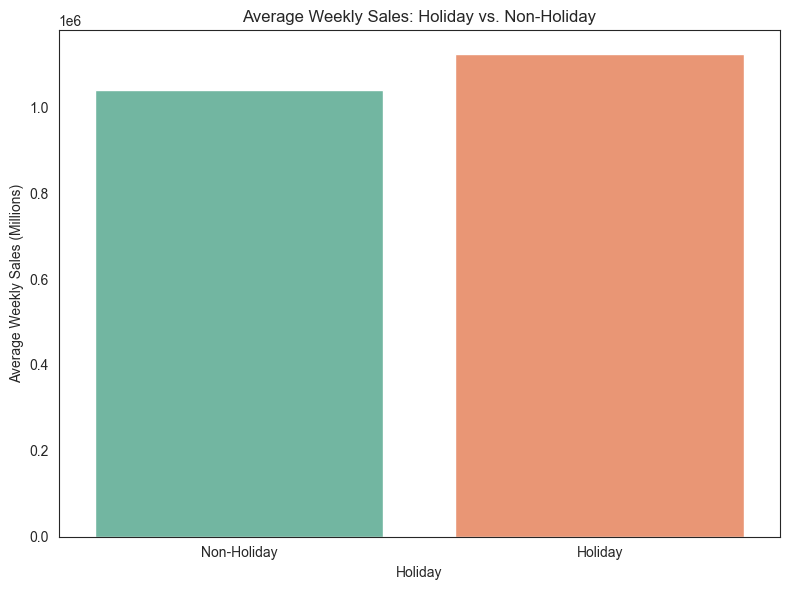

In [16]:
#Bar Plot of Holiday vs. Non-Holiday Sales: Create a bar plot to compare the average weekly sales during holiday weeks versus non-holiday weeks. This can help assess the impact of holidays on sales.

average_sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index() # Calculating average weekly sales for holiday and non-holiday weeks

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=average_sales_by_holiday, x='Holiday_Flag', y='Weekly_Sales', hue='Holiday_Flag', palette='Set2', dodge=False, legend=False)
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales (Millions)')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])  
plt.tight_layout()
plt.show()

In [ ]:
#Scatter Plot of Weekly Sales vs. Temperature: Plot weekly sales against temperature to visualize the relationship between sales and temperature. This can help identify any correlation or patterns between sales and weather conditions.

#Correlation Heatmap: Create a heatmap to visualize the correlation matrix between different numerical variables such as weekly sales, temperature, fuel price, CPI, and unemployment rate. This can help identify variables that are strongly correlated with weekly sales.

#Histogram of Weekly Sales: Plot a histogram of weekly sales to visualize the distribution of sales values. This can help assess the skewness and spread of the sales data.